In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)
clinical_trial_df = pd.read_csv(clinical_trial)

# Combine the data into a single dataset
full_data_df = pd.merge(clinical_trial_df, mouse_drug_df,on='Mouse ID',how='left')

# Display the data table for preview
full_data_df.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [32]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = full_data_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor = pd.DataFrame(grouped_data).reset_index()

# Preview DataFrame
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [18]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_stand_error = full_data_df.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].sem()


# Convert to DataFrame
tumor_stand_error = pd.DataFrame(tumor_stand_error).reset_index()

# Preview DataFrame
tumor_stand_error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [24]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor = mean_tumor.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_stand_error = tumor_stand_error.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_stand_error.head()

# Preview that Reformatting worked
tumor_stand_error.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


KeyError: 'Capomulin'

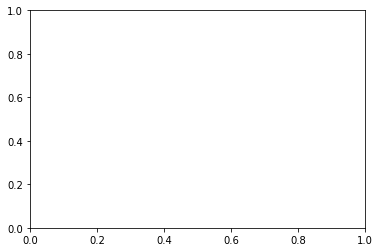

In [53]:
# Generate the Plot (with Error Bars)
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plot_dict = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

fig1, ax1 = plt.subplots()

for drug in drugs:
    ax1.errorbar(mean_tumor.index, mean_tumor[drug], tumor_stand_error[drug], fmt = plot_dict[drug])

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid(True)
plt.legend(drugs, loc='best')
plt.show()
# Save the Figure
plt.savefig("figures/tumor_response_to_treatment.png")


## Metastatic Response to Treatment

In [46]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_stats_drugtmpt = full_data_df.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()
# Convert to DataFrame
meta_stats_drugtmpt = pd.DataFrame(meta_stats_drugtmpt).reset_index()
# Preview DataFrame
meta_stats_drugtmpt.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [47]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_meta_stats = full_data_df.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()
# Convert to DataFrame
std_error_meta_stats = pd.DataFrame(std_error_meta_stats).reset_index()
# Preview DataFrame
std_error_meta_stats.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [51]:
# Minor Data Munging to Re-Format the Data Frames
meta_stats_time = meta_stats_drugtmpt.pivot(index='Timepoint', columns="Drug", values="Metastatic Sites")
std_error_meta_stats = std_error_meta_stats.pivot(index='Timepoint', columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
meta_stats_time.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


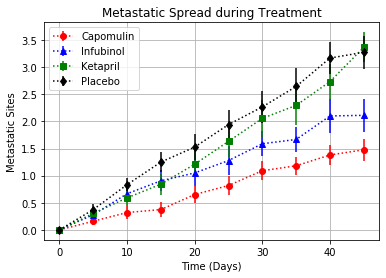

<Figure size 432x288 with 0 Axes>

In [56]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()

for drug in drugs:
    ax2.errorbar(meta_stats_time.index, meta_stats_time[drug], std_error_meta_stats[drug], fmt = plot_dict[drug])

plt.title("Metastatic Spread during Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")

plt.grid(True)
plt.legend(drugs, loc='best')
plt.show()
# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment")
# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)